In [16]:
import numpy as np
from scipy.io import loadmat
import scipy.io.wavfile
import matplotlib.pyplot as plt
from scipy.signal import *
from math import sqrt


In [17]:
sintesis = loadmat('sintesis.mat')
sintesis

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Wed Sep 09 12:18:20 2020',
 '__version__': '1.0',
 '__globals__': [],
 'coef': array([[ 1.        , -0.40321523, -0.10422101, ...,  0.00110615,
         -0.13328689,  0.09413874],
        [ 1.        , -0.40364892,  0.00571017, ..., -0.11009042,
         -0.23399183,  0.15338591],
        [ 1.        , -0.30258198, -0.04449645, ..., -0.11747033,
         -0.13732837,  0.12694894],
        ...,
        [ 1.        , -0.48897606, -0.2780322 , ...,  0.02094446,
         -0.14134451,  0.17131546],
        [ 1.        , -0.51040743, -0.16454425, ...,  0.03291948,
          0.07583863, -0.03061901],
        [ 1.        , -0.37012351, -0.29168727, ...,  0.03491205,
          0.05917975,  0.00574997]]),
 'excit': array([[ 0.23452913, -1.21976728,  0.07965829, ..., -2.13809009,
         -1.20137136, -0.84286915],
        [-1.36262477,  0.74873396,  0.47875199, ...,  0.46577369,
          0.09968263,  0.58093255],
        [ 0.0

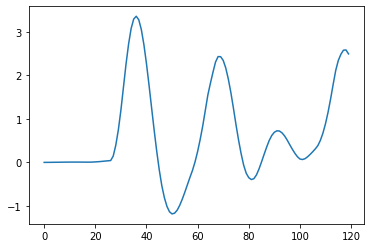

In [40]:
a, b = sintesis['coef'], sintesis['ganancia'][0]
x = np.zeros(120)
x[0] = 1

# 120 muestras, 15ms todas las muestras.
plt.plot(lfilter(b, a[100], x))

In [54]:
x = sintesis['excit'][100]
lfilter(b, a[100], x)

y[401][120]

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.85768166e-04,
        7.24831301e-04,  1.28808480e-03,  1.92403251e-03,  2.68988125e-03,
        3.51938109e-03,  4.37261482e-03,  5.17839595e-03,  5.91915535e-03,
        6.55469371e-03,  7.04366347e-03,  7.32622659e-03,  7.43119326e-03,
        7.33091601e-03,  7.05475981e-03,  6.63623928e-03,  6.14509129e-03,
        5.77617865e-03,  6.12053580e-03,  8.30685660e-03,  1.15413107e-02,
        1.53107591e-02,  2.01561274e-02,  2.57230563e-02,  3.16773582e-02,
        3.73215982e-02,  4.20030562e-02,  1.45976441e-01,  3.95272033e-01,
        7.46447020e-01,  

In [67]:
y = []
x = sintesis['excit']
a = sintesis['coef']
b = sintesis['ganancia'][0]
longitud = len(a)
zf = []
for i in range(longitud):
    if i == 0:
        y = np.concatenate((y, lfilter(b, a[i], x[i])), axis=None)
    elif i == 1:
        
    #np.concatenate(y, lfilter(b, a[i], x[i]))
plt.plot(y), y

ValueError: Unexpected shape for zi: expected (400,), found (120,).

In [69]:
y = []
x = sintesis['excit']
a = sintesis['coef']
b = sintesis['ganancia'][0]
longitud = len(a)

zf = []
for i in range(longitud):
    if i == 0:
        y =  lfilter(b, a[i], x[i])
    elif i == 1:
        filtro, zf = lfilter(b, a[i], x[i], zi=y)
        y = np.concatenate(y, filtro, axis=None)
    else:
        filtro, zf = lfilter(b, a[i], y, zi=zf)
        y = np.concatenate(y, filtro, axis=None)

        
    #np.concatenate(y, lfilter(b, a[i], x[i]))
plt.plot(y), y

ValueError: Unexpected shape for zi: expected (400,), found (120,).